In [32]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [3]:
offset1 = 0.25
offset2 = 1

def grav_wave(t):
    
    A = np.random.rand(1)
    B = np.random.rand(1)
    C = np.random.rand(1)
    D = 100 + np.random.rand(1)
    E = np.random.rand(1)

    y1 = (A * np.exp(-(np.square((t-0.00)-B))/(np.square(C))) * np.sin(D*t + E))
    y2 = (A * np.exp(-(np.square((t-offset1)-B))/(np.square(C))) * np.sin(D*t + E))
    y3 = (A * np.exp(-(np.square((t-offset2)-B))/(np.square(C))) * np.sin(D*t + E))
    
    # noise = np.random.uniform(-0.5, 0.5, size=y1.shape)
    noise = 0.5 * np.random.normal(0,1,8192)
    
    n1 = y1 + noise
    n2 = y2 + noise
    n3 = y3 + noise
    
    return (n1, n2, n3, y1, y2, y3)


In [4]:
t = np.linspace(-2, 3, 8192)

# Generate Training Data

x_train_1 = []
x_train_2 = []
x_train_3 = []
y_train = []
y_train_2 = []
y_train_3 = []

for i in range(4500):
    wave = grav_wave(t)
    x_train_1.append(wave[0])
    x_train_2.append(wave[1])
    x_train_3.append(wave[2])
    y_train.append(wave[3])
    
    # for displaying purposes
    if i == 0:
        y_train_2.append(wave[4])
        y_train_3.append(wave[5])


Clean wave:


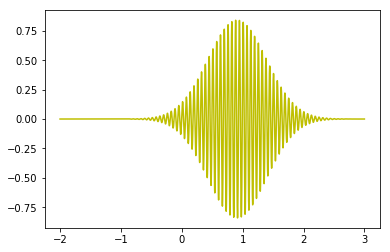

1st Detection:


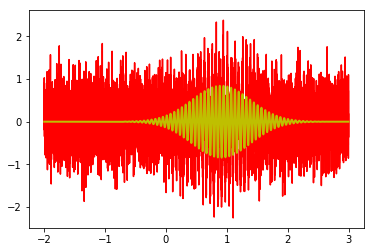

2nd Detection:


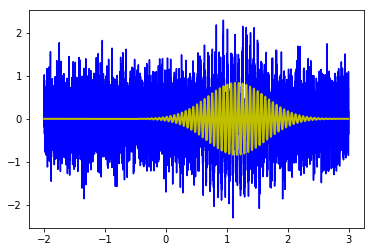

3rd Detection:


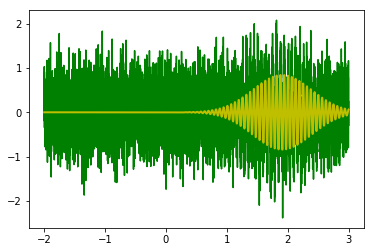

In [5]:
# Display an Example of Training Data

print("Clean wave:")
plt.cla()
plt.plot(t, y_train[0], "y-")
plt.show()

print("1st Detection:")
plt.cla()
plt.plot(t, x_train_1[0], "r-")
plt.plot(t, y_train[0], "y-",linewidth=2.0)
plt.show()

print("2nd Detection:")
plt.cla()
plt.plot(t, x_train_2[0], "b-")
plt.plot(t, y_train_2[0], "y-",linewidth=2.0)
plt.show()

print("3rd Detection:")
plt.cla()
plt.plot(t, x_train_3[0], "g-")
plt.plot(t, y_train_3[0], "y-",linewidth=2.0)
plt.show()


In [6]:
# Generate Testing Data

x_test_1 = []
x_test_2 = []
x_test_3 = []
y_test = []

for i in range(500):
    wave = grav_wave(t)
    x_test_1.append(wave[0])
    x_test_2.append(wave[1])
    x_test_3.append(wave[2])
    y_test.append(wave[3])


In [35]:
# Reshape x_train to have a shape of (4500, 8192, 3)
x_train_1 = np.squeeze(x_train_1)
x_train_2 = np.squeeze(x_train_2)
x_train_3 = np.squeeze(x_train_3)

x_train_1 = np.array(x_train_1)
x_train_2 = np.array(x_train_2)
x_train_3 = np.array(x_train_3)

x_train_1 = np.expand_dims(x_train_1, axis=-1)
x_train_2 = np.expand_dims(x_train_2, axis=-1)
x_train_3 = np.expand_dims(x_train_3, axis=-1)

x_train = np.concatenate((x_train_1, x_train_2, x_train_3), axis=-1)
print(x_train.shape)
# x_train = np.expand_dims(x_train, axis=0)
# print(x_train.shape)

# Reshape x_test to have a shape of (500, 8192, 3)
x_test_1 = np.squeeze(x_test_1)
x_test_2 = np.squeeze(x_test_2)
x_test_3 = np.squeeze(x_test_3)

x_test_1 = np.array(x_test_1)
x_test_2 = np.array(x_test_2)
x_test_3 = np.array(x_test_3)

x_test_1 = np.expand_dims(x_test_1, axis=-1)
x_test_2 = np.expand_dims(x_test_2, axis=-1)
x_test_3 = np.expand_dims(x_test_3, axis=-1)

x_test = np.concatenate((x_test_1, x_test_2, x_test_3), axis=-1)
x_test = np.expand_dims(x_test, axis=0)

# Convert y_train and y_test to NumPy Arrays (from Python Lists)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(y_train.shape)

(4500, 8192, 3)
(4500, 8192)


In [38]:
def build_model():
    # here layers is a list with 4 elements
    
    model = Sequential()
    
    model.add(Conv1D(32, (3), input_shape=(8192, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    
    model.add(Flatten())
    
    model.add(Dense(
        output_dim = 8192))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
    
    # try changing whether there is dropout, activation function, loss function, number of layers, in/out of layers
    
    return model

In [39]:
epochs = 1
global_start_time = time.time()

model = build_model()

model.fit(x_train,
          y_train,
          batch_size=64,
          nb_epoch=epochs,
          validation_split=0.05)

predicted = model.predict(x_test)

print('Training duration (min) : ', (time.time() - global_start_time)/60)

/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8192)`
  del sys.path[0]
/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 4275 samples, validate on 225 samples
Epoch 1/1


InvalidArgumentError: Shape [294708960,8192] is too large (more than 1099511627776 entries)
	 [[Node: dense_2/kernel = VariableV2[container="", dtype=DT_FLOAT, shape=[294708960,8192], shared_name="", _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'dense_2/kernel', defined at:
  File "/Users/clarle/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/clarle/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-c70110593e5b>", line 4, in <module>
    model = build_model()
  File "<ipython-input-14-19fc79e67f3d>", line 13, in build_model
    output_dim = 8192))
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/keras/engine/sequential.py", line 187, in add
    output_tensor = layer(self.outputs[0])
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/keras/engine/base_layer.py", line 432, in __call__
    self.build(input_shapes[0])
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/keras/layers/core.py", line 872, in build
    constraint=self.kernel_constraint)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 399, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 294, in _init_from_args
    name=name)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 128, in variable_op_v2
    shared_name=shared_name)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 708, in _variable_v2
    name=name)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/clarle/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [294708960,8192] is too large (more than 1099511627776 entries)
	 [[Node: dense_2/kernel = VariableV2[container="", dtype=DT_FLOAT, shape=[294708960,8192], shared_name="", _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
